# 4. Rispondere alle domande
Trasforma le seguenti richiesti in formule per estrarre infromazioni dal dataframe
- Mostrami le vendite maggiori di 10

- Mostrami i dati del 2018

- Mostrami le vendite maggiori di 13 e l'anno è il 2018

- Mostrami tutto TRANNE i casi in cui le vendite sono maggiori di 13 e l'anno è il 2018

- Mostrami i dati dove le vendite divise per 3 sono maggiori di 3

- Mostrami i dipendenti i cui nomi sono alfabeticamente dopo la J



In [1]:
import numpy as np
import pandas as pd

sales = pd.DataFrame(
    data={
        "employee": [
            "Katrina",
            "Guanyu",
            "Jan",
            "Roman",
            "Jacqueline",
            "Paola",
            "Esperanza",
            "Alaina",
            "Egweyn",
        ],
        "sales": [14, 17, 6, 12, 8, 3, 7, 15, 5],
        "year": [2018, 2019, 2020, 2018, 2020, 2019, 2019, 2020, 2020],
    }
)
sales


,employee,sales,year
0,Katrina,14,2018
1,Guanyu,17,2019
2,Jan,6,2020
3,Roman,12,2018
4,Jacqueline,8,2020
5,Paola,3,2019
6,Esperanza,7,2019
7,Alaina,15,2020
8,Egweyn,5,2020


In [2]:
sales[sales['sales']>10]

,employee,sales,year
0,Katrina,14,2018
1,Guanyu,17,2019
3,Roman,12,2018
7,Alaina,15,2020


In [3]:
sales.query("sales > 10")

,employee,sales,year
0,Katrina,14,2018
1,Guanyu,17,2019
3,Roman,12,2018
7,Alaina,15,2020


In [4]:
sales[sales['year']==2018]

,employee,sales,year
0,Katrina,14,2018
3,Roman,12,2018


In [5]:
sales.query("year == 2018")

,employee,sales,year
0,Katrina,14,2018
3,Roman,12,2018


In [6]:
sales[(sales['sales']>13) & (sales['year']==2018)]

,employee,sales,year
0,Katrina,14,2018


In [7]:
sales.query("sales > 10 & year == 2018")

,employee,sales,year
0,Katrina,14,2018
3,Roman,12,2018


In [8]:
sales.query("not (sales > 13 and year == 2018)")

,employee,sales,year
1,Guanyu,17,2019
2,Jan,6,2020
3,Roman,12,2018
4,Jacqueline,8,2020
5,Paola,3,2019
6,Esperanza,7,2019
7,Alaina,15,2020
8,Egweyn,5,2020


In [9]:
sales.query("(sales/3) > 3")

,employee,sales,year
0,Katrina,14,2018
1,Guanyu,17,2019
3,Roman,12,2018
7,Alaina,15,2020


In [10]:
sales.query("employee > 'J'")

,employee,sales,year
0,Katrina,14,2018
2,Jan,6,2020
3,Roman,12,2018
4,Jacqueline,8,2020
5,Paola,3,2019


# 5. Analisi di un dataset di video giochi
1. Quanti videogiochi sono stati pubblicati
2. Quali sono i generi più popolari? Mostralo con un bar plot
3. Plotta l'evoluzione del numero di giochi pubblicati nel tempo
4. Prova a riprodurre questo plot

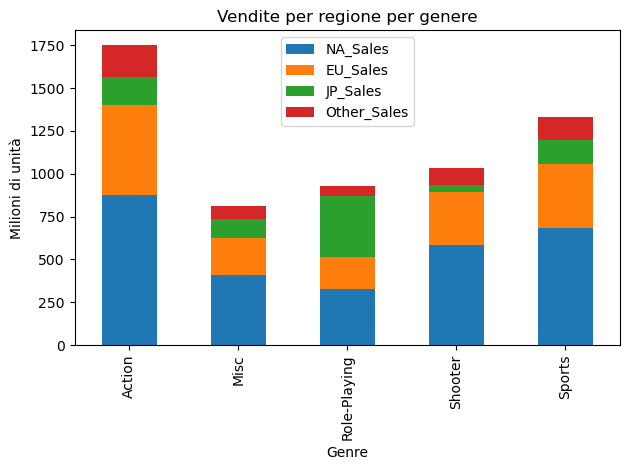


In [11]:
# Import dei pacchetti
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caricamento del dataset
url = 'https://zenodo.org/record/5898311/files/vgsales.csv'
df = pd.read_csv(url)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [12]:
df.shape[0]

16598

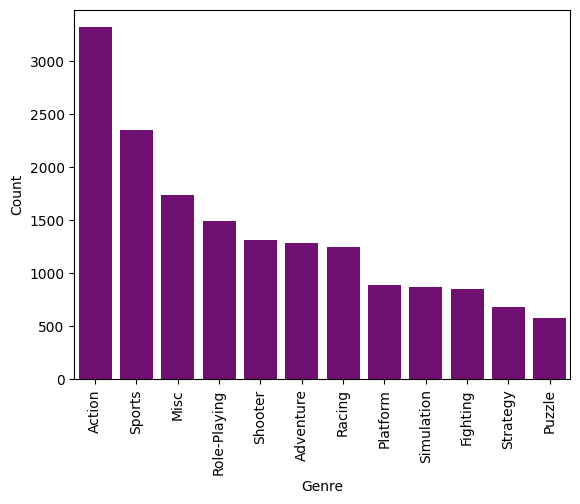

In [ ]:
gen = df['Genre'].value_counts().reset_index()
gen.columns = ['Genre', 'Count']

sns.barplot(x='Genre', y='Count', data=gen, color='red')

plt.xticks(rotation=90)   
plt.show()

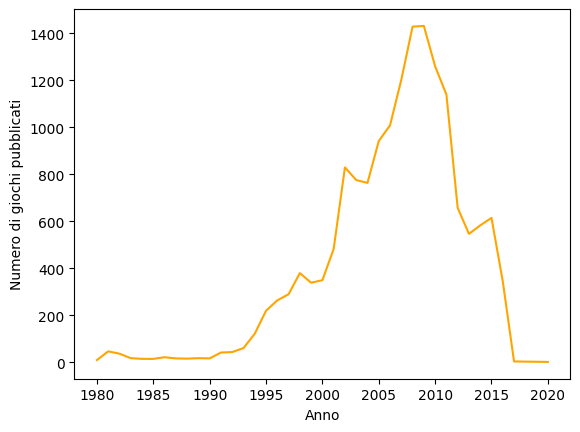

In [14]:
anno = df['Year'].value_counts().sort_index()

sns.lineplot(x=anno.index, y=anno.values, color='orange')
plt.xlabel('Anno')
plt.ylabel('Numero di giochi pubblicati')
plt.show()

Genre
Action          3316
Misc            1739
Role-Playing    1488
Shooter         1310
Sports          2346
Name: count, dtype: int64
              NA_Sales  EU_Sales  JP_Sales  Other_Sales
Genre                                                  
Action          877.83    525.00    159.95       187.38
Adventure       105.80     64.13     52.07        16.81
Fighting        223.59    101.32     87.35        36.68
Misc            410.24    215.98    107.76        75.32
Platform        447.05    201.63    130.77        51.59
Puzzle          123.78     50.78     57.31        12.55
Racing          359.42    238.39     56.69        77.27
Role-Playing    327.28    188.06    352.31        59.61
Shooter         582.60    313.27     38.28       102.69
Simulation      183.31    113.38     63.70        31.52
Sports          683.35    376.85    135.37       134.97
Strategy         68.70     45.34     49.46        11.36
              NA_Sales  EU_Sales  JP_Sales  Other_Sales
Genre                  

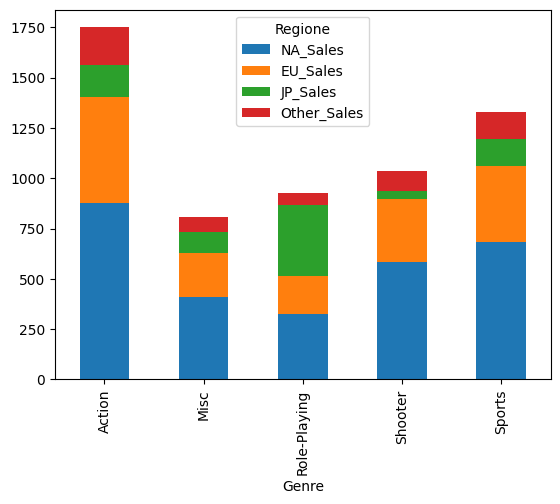

In [15]:
gen = df['Genre'].value_counts().head(5)
gen = gen.sort_index()
print(gen)

sal = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
print(sal)

table = sal.loc[gen.index]
print(table)
table = table.reset_index()

table.plot(kind='bar', x='Genre', stacked=True)
plt.legend(title='Regione')
plt.xticks(rotation=90)   
plt.show()